# PROYECTO DE MACHINE LEARNING - CLASIFICACIÓN
En este cuaderno se desarrollará un proyecto de clasificación utilizando Python, se incluye cada paso del proceso de Machine Learning aplicado al problema

In [1]:
#Importar las librerias
import pandas as pd 
import matplotlib.pyplot as pit
import numpy as np

### CARGAR EL CONJUNTO DE DATOS
Para esta practica se tomará el conjunto de dato que sse puede encontrar en la página de [Kaggle.com](https://www.kaggle.com/) como “[Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)” 

In [2]:
#Cargar los datos
data = pd.read_csv('/content/drive/MyDrive/Classroom/21B-Ing del Conocimiento ITICS/diabetes.csv')

### Entender los datos
El siguiente paso en el desarrollo de un proyecto de Machine Learning es el de entender los datos con lo se cuenta. Para este
paso se utilizan varias funciones que se tiene disponible en la librería *pandas*

In [3]:
#Mostrar la cabezara de los datos
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Mostrat la dimesion de los datos
data.shape

(768, 9)

In [5]:
#Mostrar los tipos de datos con lo que trabajamos
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Visualizar los datos
Una vez que se haya entendido los datos de manera numérica ahora se analizará de manera visual utilizando la librería matplotlib.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff678301dd0>,
      dtype=object)

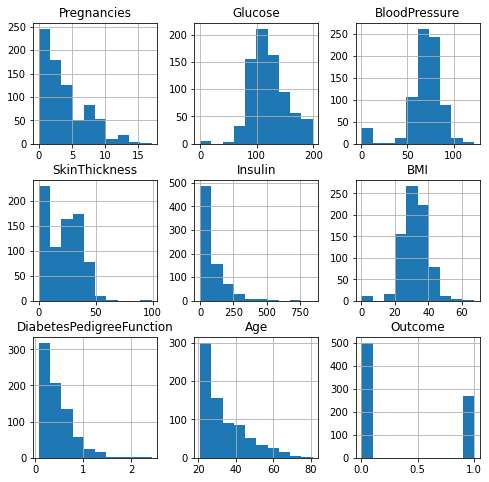

In [6]:
#Visualizando los datos
data.hist(figsize=(8,8))

### SEPARACIÓN DE LOS DATOS
Conociendo el conjunto de datos que se está trabajando dentro del proyecto, se procede a realizar la separación de los datos en dos conjuntos, el primero de variables independientes, ***X***, y un segundo conjunto de variable dependientes, ***y***.

*La primera columna se elimina porque contiene la numeración de los filas, información que no influye para el análisis de
Machine Learning. Eso correspondera a **X**.*

*Seguidamente se define los variables correspondientes a **y**, o variable dependiente, que vendría siendo la última columna del
conjunto de datos.*

In [9]:
#Seperando la primera columna del conjunto de datos a trabajar 
x = data.iloc[:, :-1].values
print(x)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [16]:
#Datos dependientes
y = data.iloc[:, -1].values
print(y_r)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

### SELECCIONANDO CARACTERÍSTICAS
Como se observo la variable X cuenta con 8 columnas, para este caso se aplicará el procedimiento para seleccionar las 5 características que tengan mayor influencia en la variable dependiente.

In [29]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [15]:
prueba = SelectKBest(score_func=chi2, k=5)
entrenamiento = prueba.fit(x, y)

np.set_printoptions(precision=3)
print(entrenamiento.scores_)

caracteristicas = entrenamiento.transform(x)
print(caracteristicas[0:5,:])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[  6.  148.    0.   33.6  50. ]
 [  1.   85.    0.   26.6  31. ]
 [  8.  183.    0.   23.3  32. ]
 [  1.   89.   94.   28.1  21. ]
 [  0.  137.  168.   43.1  33. ]]


Las 5 características que tienen mayor impacto para la variable dependiente son las siguientes:

Columna 0 – pregnancies

Columna 1 – glucose

Columna 4 – insulin

Columna 5 – bmi

Columna 7 – age

Por lo tanto, se convierte ahora las variables X con solo estas 5 columnas.

In [18]:
x = data.iloc[:,[0,1,4,5,7]].values
print(x)

[[  6.  148.    0.   33.6  50. ]
 [  1.   85.    0.   26.6  31. ]
 [  8.  183.    0.   23.3  32. ]
 ...
 [  5.  121.  112.   26.2  30. ]
 [  1.  126.    0.   30.1  47. ]
 [  1.   93.    0.   30.4  23. ]]


### PROCESAMIENTO DE LOS DATOS
Definido los valores de X que se utilizaran en los algoritmos, ahora se procede a realizar el respectivo procesamiento de los
datos.

Para este caso solamente se estandarizarán los datos, ya que los mismos se encuentran en distintas escalas y esto puede
ocasionar errores en el análisis.

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
#Estandarizacion de los datos
sc = StandardScaler()
x = sc.fit_transform(x)

print(x)

[[ 0.64   0.848 -0.693  0.204  1.426]
 [-0.845 -1.123 -0.693 -0.684 -0.191]
 [ 1.234  1.944 -0.693 -1.103 -0.106]
 ...
 [ 0.343  0.003  0.28  -0.735 -0.276]
 [-0.845  0.16  -0.693 -0.24   1.171]
 [-0.845 -0.873 -0.693 -0.202 -0.871]]


### SEPARACIÓN DE LOS DATOS
Se llega al último paso antes de implementar los algoritmos de Machine Learning, este es el correspondiente al de separar los datos en entrenamiento y prueba, para esto se utiliza la función train_test_split de la librería scikit-learn

In [23]:
#Importar libreria
from sklearn.model_selection import train_test_split

In [24]:
#Separacion de datos de prueba y entrenamiento 
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.25, random_state = 0)

### APLICACIÓN DE LOS ALGORITMOS DE CLASIFICACIÓN
Se implementarán los algoritmos vistos con anterioridad y se evaluarán

### Regresión Logística

In [25]:
### Regresión Logística
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(x_train, y_train)
y_pred = modelo.predict(x_test)

print("Datos de entrenamiento")
print(y_test)
print("")
print("Datos obtenidos en la prediccion")
print(y_pred)

Datos de entrenamiento
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]

Datos obtenidos en la prediccion
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0]


In [30]:
from sklearn.metrics import classification_report

In [26]:
# Reporte de clasificacion
reporte = classification_report(y_test, y_pred)
print(reporte)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       130
           1       0.72      0.55      0.62        62

    accuracy                           0.79       192
   macro avg       0.77      0.72      0.74       192
weighted avg       0.78      0.79      0.78       192



### Bosques Aleatorios Clasificación

In [27]:
# Bosques Aleatorios 
from sklearn.ensemble import  RandomForestClassifier

modelo = RandomForestClassifier()
modelo.fit(x_train, y_train)
y_pred = modelo.predict(x_test)

print("Datos de entrenamiento")
print(y_test)
print("")
print("Datos obtenidos en la prediccion")
print(y_pred)

Datos de entrenamiento
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]

Datos obtenidos en la prediccion
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0]


In [28]:
# Reporte de clasificacion
reporte = classification_report(y_test, y_pred)
print(reporte)

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       130
           1       0.72      0.61      0.66        62

    accuracy                           0.80       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.79      0.80      0.79       192

